In [ ]:
# Author : Pawan J Sutar
# Email  : pjsutar@iu.edu
# Course : PYTHON Certification Training for Data Science

# Certification Project
# Domain : Social Media

# GBM for Popularity Analysis

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,roc_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

In [2]:
cols=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
      "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
     "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
     "weekday_is_saturday","weekday_is_sunday"]

In [3]:
len(cols)

13

In [4]:
datac=pd.read_csv("data.csv")

In [5]:
target=pd.read_csv("target.csv")

In [6]:
datac.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,0.001,1.737192,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500
1,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,0.001,1.777445,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000
2,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,0.001,1.685355,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000
3,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,0.001,1.687490,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000
4,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,0.001,1.737626,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364


In [7]:
target.head()

,shares,sharesB,sharesLog
0,593,0,6.385194
1,711,0,6.566672
2,1500,1,7.313220
3,1200,0,7.090077
4,505,0,6.224558


In [8]:
check=PCA(n_components='mle',svd_solver='full')
check.fit(datac.drop(cols,axis=1))

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [19]:
dataAfterSVD=pd.DataFrame(np.dot(datac.drop(cols,axis=1),dataSVD))
dataAfterPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
0,-5.686480,-9.318260,2.859732,0.046361,4.610109,-0.831687,-1.758245,-1.115568,0.275839,0.298734,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.190354,-0.536630,0.216537,-0.110050,5.618105,-1.156996,-1.671289,-0.699136,0.102430,0.614461,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-6.205912,-10.159002,3.107096,0.062724,4.401179,-0.767702,-1.832432,-1.358718,0.263126,0.485981,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.190527,-0.576291,0.221597,-0.141398,6.529074,-1.397465,-1.933142,-0.933397,0.412656,0.193836,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-7.541962,-12.285155,3.777634,-0.060691,7.390618,-1.288160,0.345524,0.642983,-0.215664,0.465190,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dataPCA=pd.DataFrame(check.components_.T,columns=["%d"%(i) for i in range(len(check.components_))])
dataPCA.shape

(45, 44)

In [13]:
dataAfterPCA=pd.DataFrame(np.dot(datac.drop(cols,axis=1),dataPCA))
dataAfterPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-5.686480,-9.318260,2.859732,0.046361,4.610109,-0.831687,-1.758245,-1.115568,0.275839,0.298734,...,-0.008724,-0.016862,-0.010675,0.003238,0.042287,-0.112825,0.362762,0.053087,0.001784,0.015227
1,-0.190354,-0.536630,0.216537,-0.110050,5.618105,-1.156996,-1.671289,-0.699136,0.102430,0.614461,...,0.001681,-0.049293,-0.053622,-0.000803,-0.018211,-0.109805,0.340192,0.042129,-0.001497,0.028914
2,-6.205912,-10.159002,3.107096,0.062724,4.401179,-0.767702,-1.832432,-1.358718,0.263126,0.485981,...,-0.081554,-0.070033,-0.050404,0.060628,-0.056930,-0.055497,0.365798,0.040237,-0.006935,0.001937
3,-0.190527,-0.576291,0.221597,-0.141398,6.529074,-1.397465,-1.933142,-0.933397,0.412656,0.193836,...,0.053807,0.016892,0.014535,0.029152,-0.013508,-0.085820,0.373108,0.022811,0.008162,0.016969
4,-7.541962,-12.285155,3.777634,-0.060691,7.390618,-1.288160,0.345524,0.642983,-0.215664,0.465190,...,-0.014135,0.005743,-0.060418,0.023126,-0.024036,-0.073626,0.334649,0.051912,0.018403,0.018966


In [14]:
dataAfterPCA=pd.concat([dataAfterPCA,datac[cols]],axis=1)
dataAfterPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
0,-5.686480,-9.318260,2.859732,0.046361,4.610109,-0.831687,-1.758245,-1.115568,0.275839,0.298734,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.190354,-0.536630,0.216537,-0.110050,5.618105,-1.156996,-1.671289,-0.699136,0.102430,0.614461,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-6.205912,-10.159002,3.107096,0.062724,4.401179,-0.767702,-1.832432,-1.358718,0.263126,0.485981,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.190527,-0.576291,0.221597,-0.141398,6.529074,-1.397465,-1.933142,-0.933397,0.412656,0.193836,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-7.541962,-12.285155,3.777634,-0.060691,7.390618,-1.288160,0.345524,0.642983,-0.215664,0.465190,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dataAfterPCA.shape

(39644, 57)

In [16]:
checktruncatedSVD=TruncatedSVD(n_components=20)
checktruncatedSVD.fit(datac.drop(cols,axis=1))

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=5,
             random_state=None, tol=0.0)

In [17]:
dataSVD=pd.DataFrame(checktruncatedSVD.components_.T,columns=["%d"%(i) for i in range(len(checktruncatedSVD.components_))])
dataSVD.shape

(45, 20)

In [18]:
dataAfterSVD=pd.DataFrame(np.dot(datac.drop(cols,axis=1),dataSVD))
dataAfterSVD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.466530,-3.211009,-7.943147,3.895224,0.542789,4.548158,-1.730448,-1.065840,0.275832,0.347240,0.267277,0.592122,0.081599,0.655210,0.864078,-0.263199,0.747529,-0.725976,1.441684,1.840757
1,1.850226,-0.664150,0.515449,0.016866,0.847365,5.531356,-1.624389,-0.639681,0.102535,0.660528,-0.022816,0.637355,0.101212,0.848845,0.283162,-0.494309,1.001019,-0.353582,1.420799,1.547431
2,6.876396,-3.452095,-8.766760,4.264833,0.497332,4.343456,-1.810392,-1.310114,0.263228,0.535845,0.028667,0.734967,0.090048,0.354436,0.322573,-0.407063,0.918305,-0.876260,0.986746,1.970616
3,2.086823,-0.749849,0.623565,-0.011880,0.965353,6.427127,-1.871000,-0.851111,0.417680,0.229733,0.070695,0.651693,0.135798,0.080534,0.244390,-0.431213,0.847399,-1.035062,1.438717,1.749160
4,8.486463,-4.191425,-10.520080,5.153200,0.594077,7.306116,0.421197,0.686956,-0.218556,0.514653,-0.075804,0.589713,-0.074860,1.201807,0.776899,-0.232926,1.103445,-0.836382,1.390804,1.631469


In [20]:
dataAfterSVD=pd.concat([dataAfterSVD,datac[cols]],axis=1)
dataAfterSVD.head()

,0,1,2,3,4,5,6,7,8,9,...,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
0,6.466530,-3.211009,-7.943147,3.895224,0.542789,4.548158,-1.730448,-1.065840,0.275832,0.347240,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.850226,-0.664150,0.515449,0.016866,0.847365,5.531356,-1.624389,-0.639681,0.102535,0.660528,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.876396,-3.452095,-8.766760,4.264833,0.497332,4.343456,-1.810392,-1.310114,0.263228,0.535845,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.086823,-0.749849,0.623565,-0.011880,0.965353,6.427127,-1.871000,-0.851111,0.417680,0.229733,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.486463,-4.191425,-10.520080,5.153200,0.594077,7.306116,0.421197,0.686956,-0.218556,0.514653,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dataAfterSVD.shape

(39644, 33)

In [23]:
predictors=[x for x in datac.columns]
paramTest1={'n_estimators':list(range(20,81,10))}
gsearch1=GridSearchCV(
        estimator=GradientBoostingClassifier(
                    learning_rate=0.05,
                    min_samples_split=400,
                    min_samples_leaf=50,
                    max_depth=8,
                    max_features='sqrt',
                    subsample=0.8,
                    random_state=10),
        param_grid=paramTest1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch1.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=400,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pr

In [25]:
gsearch1.cv_results_,gsearch1.best_params_,gsearch1.best_score_

({'mean_fit_time': array([1.61148825, 2.13289227, 2.87969375, 3.5128015 , 4.25122581,
         4.65134954, 5.05507908]),
  'std_fit_time': array([0.10272709, 0.18929296, 0.27547934, 0.1334476 , 0.20606913,
         0.17568133, 0.43029491]),
  'mean_score_time': array([0.0177536 , 0.02174206, 0.02752857, 0.02972021, 0.03271446,
         0.03670731, 0.03710127]),
  'std_score_time': array([0.00230904, 0.00364551, 0.00256995, 0.00222134, 0.00193441,
         0.00192357, 0.00317895]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.6339453 , 0.63443161, 0.63603526, 0.63390612, 0.63589222,
         0.63481535, 0.63101609]),
  'spl

In [26]:
paramTest2={'max_depth':list(range(5,16,2)),
            'min_samples_split':list(range(200,1001,200))}
gsearch2=GridSearchCV(estimator=
                     GradientBoostingClassifier(learning_rate=0.05,
                                               n_estimators=60,
                                               max_features='sqrt',
                                                min_samples_leaf=50,
                                               subsample=0.8,
                                               random_state=10),
                     param_grid=paramTest2,scoring='roc_auc',
                     n_jobs=4,iid=False,cv=5)
gsearch2.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
                                                  preso

In [27]:
gsearch2.cv_results_,gsearch2.best_params_,gsearch2.best_score_

({'mean_fit_time': array([ 2.46879544,  2.38661304,  2.54618821,  2.36387324,  2.26015196,
          4.02841911,  3.76911483,  3.37297497,  3.22836237,  3.09850883,
          5.70653172,  4.86877308,  4.71239181,  5.70054727,  5.91058712,
         11.60515108,  9.52890582,  8.11568685,  8.11568613,  6.78504643,
         15.05691624, 11.9103343 , 10.01340857,  8.94606476,  6.34961123,
         10.57949519,  6.70725431,  5.42348943,  5.20487428,  4.67689133]),
  'std_fit_time': array([0.09535489, 0.40837235, 0.21965202, 0.04545563, 0.10538721,
         0.13704841, 0.38326713, 0.07626117, 0.06606501, 0.14532656,
         0.08465794, 0.2589095 , 0.6455289 , 0.64922051, 0.59452695,
         0.58365918, 0.36546563, 0.94055667, 0.92499795, 1.03298859,
         1.58941734, 0.39753826, 0.10271712, 0.10445101, 0.39709846,
         1.07812815, 0.52587506, 0.35522766, 0.13003345, 0.58864794]),
  'mean_score_time': array([0.02972031, 0.02553229, 0.02513175, 0.02473416, 0.02533369,
         0.033312

In [28]:
paramTest3={'min_samples_split':list(range(1000,2100,200)),
            'min_samples_leaf':list(range(30,71,10))}
gsearch3=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                          n_estimators=60,
                                                          max_depth=9,
                                                          max_features='sqrt',
                                                          subsample=0.8,
                                                          random_state=10),
                     param_grid=paramTest3,scoring='roc_auc',n_jobs=4,
                     iid=False,cv=5)
gsearch3.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=9,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
                                                  presor

In [29]:
gsearch3.cv_results_,gsearch3.best_params_,gsearch3.best_score_

({'mean_fit_time': array([3.98015018, 3.66758742, 3.74797163, 3.62210803, 3.14777722,
         2.95569091, 4.30448241, 3.6552207 , 3.45236173, 3.27962537,
         3.3859406 , 2.90343242, 3.63607078, 3.37556815, 2.99857707,
         3.28461452, 3.57224202, 3.16094227, 4.3657186 , 3.47290621,
         3.16154099, 3.0424592 , 2.86333938, 2.76141257, 3.80960817,
         4.0651238 , 3.82496486, 3.44657874, 3.08015885, 2.74646173]),
  'std_fit_time': array([0.05508205, 0.18688822, 0.15233873, 0.26329934, 0.19885463,
         0.29982146, 0.16540808, 0.1510663 , 0.17181722, 0.22018884,
         0.17217403, 0.22395121, 0.16262055, 0.22734075, 0.15116083,
         0.40065086, 0.23228548, 0.31645135, 0.07552053, 0.32437432,
         0.24534921, 0.13018517, 0.15838783, 0.19039827, 0.34676187,
         0.11671732, 0.16881044, 0.20586196, 0.2482172 , 0.46920423]),
  'mean_score_time': array([0.03151569, 0.03211446, 0.03351097, 0.03271413, 0.02732701,
         0.03231373, 0.03510656, 0.03331256, 0.

In [30]:
gsearch3.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

CV Score : Mean - 0.7120728 | Std - 0.03620928 | Min - 0.6440924 | Max - 0.7443357


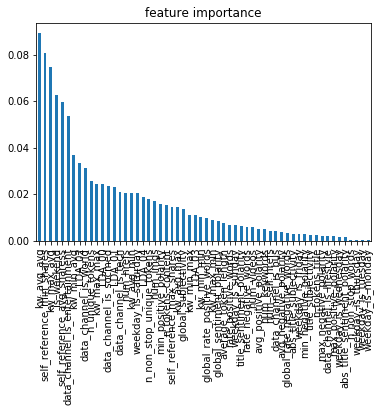

In [46]:
get_accuracy_clf(gsearch3.best_estimator_,datac,target.sharesB)

In [32]:
paramTest4={'max_features':list(range(1,20,2))}
gsearch4=GridSearchCV(
    estimator=GradientBoostingClassifier(learning_rate=0.05,
                                         n_estimators=60,
                                         max_depth=9,
                                         min_samples_split=1000,
                                         min_samples_leaf=60,
                                        subsample=0.8,
                                        random_state=10),
    param_grid=paramTest4,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch4.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=9,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=60,
                                                  min_samples_split=1000,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
                                                  pres

In [33]:
gsearch4.cv_results_,gsearch4.best_params_,gsearch4.best_score_

({'mean_fit_time': array([ 2.15882411,  3.47949009,  4.8480288 ,  5.87029262,  7.5958775 ,
          8.84014854, 10.46779346, 11.73959293, 12.38346782, 13.65087757]),
  'std_fit_time': array([0.04148563, 0.1055202 , 0.10559817, 0.2474631 , 0.21448892,
         0.14191236, 0.16253258, 0.41980247, 0.6211242 , 0.61591419]),
  'mean_score_time': array([0.04188857, 0.05445447, 0.04847031, 0.04906902, 0.05166225,
         0.04687467, 0.0458786 , 0.05405307, 0.04707432, 0.0468749 ]),
  'std_score_time': array([0.00553495, 0.00877645, 0.00761131, 0.0113786 , 0.01459593,
         0.01101556, 0.00649448, 0.01052665, 0.00447797, 0.00496611]),
  'param_max_features': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 1},
   {'max_features': 3},
   {'max_features': 5},
   {'max_features': 7},
   {'max

In [34]:
paramTest5={'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5=GridSearchCV(estimator= 
                      GradientBoostingClassifier(learning_rate=0.05,
                                                max_depth=9,
                                                max_features=3,
                                                n_estimators=60,
                                                min_samples_split=1000,
                                                min_samples_leaf=60,
                                                random_state=10),
                     param_grid=paramTest5,scoring='roc_auc',n_jobs=4,
                     iid=False,cv=5)
gsearch5.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=9,
                                                  max_features=3,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=60,
                                                  min_samples_split=1000,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
                                                  presort

In [35]:
gsearch5.cv_results_,gsearch5.best_params_,gsearch5.best_score_

({'mean_fit_time': array([2.46600218, 2.72111883, 2.73169198, 2.96726151, 3.07676597,
         3.04385591]),
  'std_fit_time': array([0.09827222, 0.17598159, 0.13667203, 0.11464197, 0.40912562,
         0.16919481]),
  'mean_score_time': array([0.03789873, 0.04109073, 0.04268565, 0.040692  , 0.05984259,
         0.05245953]),
  'std_score_time': array([0.00308984, 0.00247597, 0.00222205, 0.00203255, 0.03608624,
         0.01379996]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'split0_test_score': array([0.66205333, 0.66003643, 0.66033637, 0.66125934, 0.66583833,
         0.66534045]),
  'split1_test_score': array([0.70153119, 0.7031248 , 0.7039071 , 0.70341401, 0.70429026,
         0.703182

CV Score : Mean - 0.7151118 | Std - 0.02873785 | Min - 0.6653404 | Max - 0.7431866


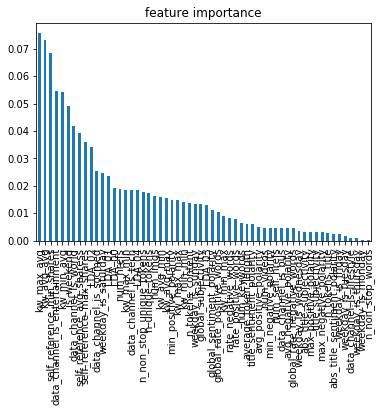

In [43]:
gbm_tuned_1=GradientBoostingClassifier(learning_rate=0.05,
                                                max_depth=9,
                                                max_features=3,
                                                n_estimators=60,
                                                min_samples_split=1000,
                                                min_samples_leaf=60,
                                                random_state=10,
                                      subsample=0.9)
get_accuracy_clf(gbm_tuned_1,datac,target.sharesB)

CV Score : Mean - 0.7078251 | Std - 0.03224193 | Min - 0.6494208 | Max - 0.7401696


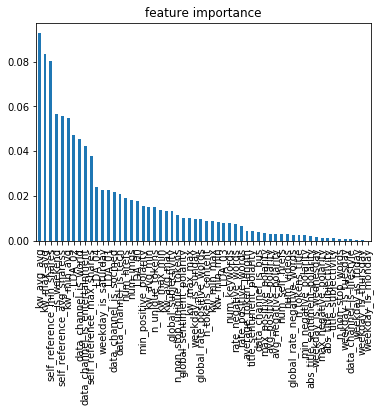

In [44]:
gbm_tuned_1=GradientBoostingClassifier(learning_rate=0.005,
                                                max_depth=9,
                                                max_features=3,
                                                n_estimators=60,
                                                min_samples_split=1000,
                                                min_samples_leaf=60,
                                                random_state=10,
                                      subsample=0.9)
get_accuracy_clf(gbm_tuned_1,datac,target.sharesB)

CV Score : Mean - 0.7064495 | Std - 0.03321439 | Min - 0.6463646 | Max - 0.7408587


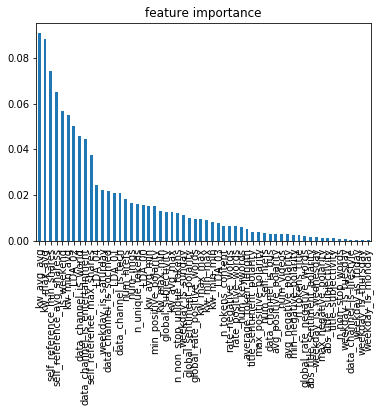

In [45]:
gbm_tuned_1=GradientBoostingClassifier(learning_rate=0.001,
                                                max_depth=9,
                                                max_features=3,
                                                n_estimators=60,
                                                min_samples_split=1000,
                                                min_samples_leaf=60,
                                                random_state=10,
                                      subsample=0.9)
get_accuracy_clf(gbm_tuned_1,datac,target.sharesB)

## Classification

In [36]:
def get_accuracy_clf(clf,X,y,kf=None,dokf=False):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    i=0
    if dokf:
        for train_index,test_index in kf.split(X):
            print("iteration : ",i+1)
            xTrain,xTest=X.loc[train_index,:],X.loc[test_index,:]
            yTrain,yTest=y.loc[train_index],y.loc[test_index]
    #         print(xTest[xTest.isin([np.nan,-np.inf,np.inf]).any(1)])
    #         print(xTrain[0])
    #         print(yTrain[yTrain.isin([np.nan,-np.inf,np.inf])])
    #         df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
            clf.fit(xTrain,yTrain)
            prediction=clf.predict(xTest)
    #         print("prediction",prediction)
    #         print(yTest)
            fpr,tpr,thresholds=roc_curve(yTest,prediction)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            i=i+1
            featImp=pd.Series(clf.feature_importances_,[x for x in xTrain.columns]).sort_values(ascending=False)
            featImp.plot(kind="bar",title="feature importance")
    clf.fit(X,y)
    cv_score=cross_val_score(clf,X,y,cv=5,scoring='roc_auc')
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" 
           % (np.mean(cv_score),
              np.std(cv_score),
              np.min(cv_score),
              np.max(cv_score)))
    featImp=pd.Series(clf.feature_importances_,[x for x in X.columns]).sort_values(ascending=False)
    featImp.plot(kind="bar",title="feature importance")
    if dokf:
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        return mean_auc,mean_tpr,mean_fpr
    return
    

        

## Gradient Boost Machine

iteration :  1
iteration :  2
iteration :  3
iteration :  4
iteration :  5
CV Score : Mean - 0.6950376 | Std - 0.05568792 | Min - 0.5904393 | Max - 0.7442395
The ROC area under curve is :  0.6567823363745984


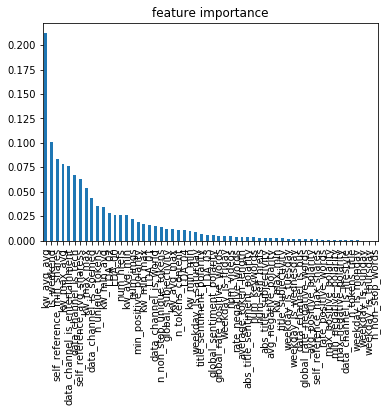

In [37]:
gbm=GradientBoostingClassifier()
kf=KFold(n_splits=5)
auc_mean,tpr,fpr=get_accuracy_clf(gbm,datac,target.sharesB,kf,dokf=True)
print("The ROC area under curve is : ",auc_mean)

## Random Forest Classifier

iteration :  1


C:\Users\pawan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


iteration :  2
iteration :  3
iteration :  4
iteration :  5
CV Score : Mean - 0.6549158 | Std - 0.03434722 | Min - 0.5890671 | Max - 0.6814142
The ROC area under curve is :  0.6171468842083669


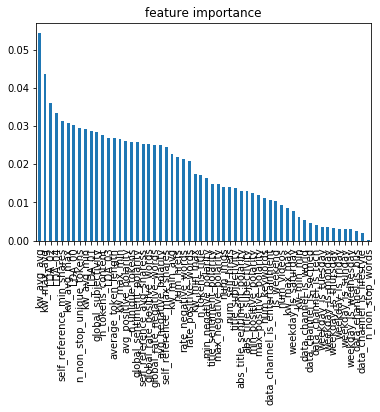

In [38]:
rfClf=RandomForestClassifier()
auc_mean2,tpr2,fpr2=get_accuracy_clf(rfClf,datac,target.sharesB,kf,dokf=True)
print("The ROC area under curve is : ",auc_mean2)

## Plotting the ROC curve

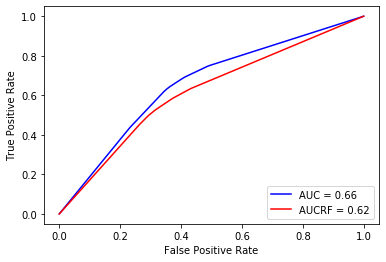

In [39]:
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % (auc_mean))
plt.plot(fpr2,tpr2,'r',label='AUCRF = %0.2f' % (auc_mean2))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Regression

In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [41]:
def get_accuracy_reg(reg,data,target,kf):
#     print(data.index)
    score=[]
    score2=[]
    i=0
    targetl=np.log(1+target)
    for train_index,test_index in kf.split(data):
        print("iteration : ",i)
        xTrain,xTest=data.loc[train_index,:],data.loc[test_index,:]
        yTrain,yTest=targetl.loc[train_index],targetl.loc[test_index]
        yCheckTrain,yCheckTest=target.loc[train_index],target.loc[test_index]
#         print(xTest[xTest.isin([np.nan,-np.inf,np.inf]).any(1)])
#         print(xTrain[0])
#         print(yTrain[yTrain.isin([np.nan,-np.inf,np.inf])])
#         df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
        reg.fit(xTrain,yTrain)
        prediction=reg.predict(xTest)
#         print("prediction",prediction)
#         print(yTest)
        score.append(mean_absolute_percentage_error(yTest,prediction))
        score2.append(mean_absolute_percentage_error(yCheckTest,np.exp(prediction)))
        i+=1
        featImp=pd.Series(reg.feature_importances_,[x for x in xTrain.columns]).sort_values(ascending=False)
        featImp.plot(kind="bar",title="feature importance")
#     print("mean absolute percentage error is ",score)
    return score,score2
    

## Gradient Boost Regressor

iteration :  0
iteration :  1
iteration :  2
iteration :  3
iteration :  4
MAPE_LOG:  8.774176397993726
MAPE:  88.54439767166039


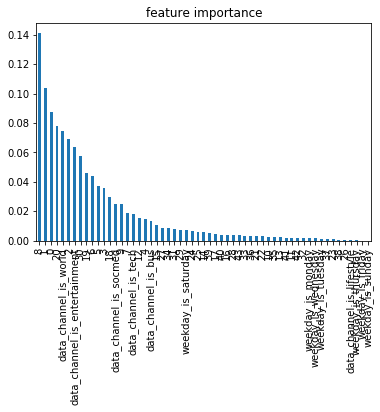

In [47]:
gbr=GradientBoostingRegressor()
regscore,regscore2=get_accuracy_reg(gbr,dataAfterPCA,target.shares,kf)
print("MAPE_LOG: ",sum(regscore)/len(regscore))
print("MAPE: ",sum(regscore2)/len(regscore2))

## Random Forest Regressor

iteration :  0


C:\Users\pawan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


iteration :  1
iteration :  2
iteration :  3
iteration :  4
MAPE_LOG:  9.416691503823566
MAPE:  101.21136415645621


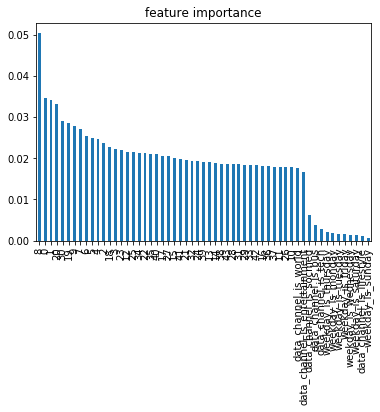

In [48]:
rfr=RandomForestRegressor()
rfrRegScore,rfrRegScore2=get_accuracy_reg(rfr,dataAfterPCA,target.shares,kf)
print("MAPE_LOG: ",sum(rfrRegScore)/len(rfrRegScore))
print("MAPE: ",sum(rfrRegScore2)/len(rfrRegScore2))